In [2]:
from src import *
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 25,
                     'font.family': 'Candara',
                     'text.usetex': True
                     })

%load_ext autoreload
%autoreload 2

# ED

Run ED on a small lattice just for reference.

In [ ]:
# parameters
Lx, Ly = 2,2
lat = hilbert.lattice(Lx, Ly)

# dynamics related stuff
steps = 2000
endtime = 2.
breakdown = lambda t: -2

# links to process
links = [(0,2)]

# run and make it a reference
ed = exact.ED(lat, steps, endtime, perturbator=breakdown)
ed.run()
ref = np.array(ed.observables['correlations'][(0,2)])

# **Parameters and data files**

Here, we're only reading the data from ULTRAFAST. Note: the data is in physical units, while in the ULTRAFAST code and output, it's in computational units.

In [23]:
# times used
times = np.linspace(0, 2, 1001)[:-2]

# alphas and sizes
alphas = [1,2,3,4,5]
sizes = [2,4,6]

# folders
alphas_address = "data/alpha_dependence/"
sizes_address = "data/size_dependence/"

# file addresses
alphas_files = [alphas_address + "Spincorr_4_{:}.txt".format(a) for a in alphas]
sizes_files = [sizes_address + "Spincorr_{:}_1.txt".format(int(s**2)) for s in sizes]

In [24]:
# read all alpha files
alphas_data = [np.loadtxt(file)[:999] for file in alphas_files]

# read all size files
sizes_data = [np.loadtxt(file)[:999] for file in sizes_files]

# <span style='color: lightgreen'> **Plots** </span>

## $\alpha$-s plot

In [14]:
# color maps black magic
to_hex = lambda rgba: '#{:02x}{:02x}{:02x}'.format(*(int(255*x) for x in rgba[:3]))
cmap = plt.get_cmap('autumn')
num_colors = 8
values = np.linspace(0, 1, num_colors)
colors = [to_hex(cmap(v)) for v in values]

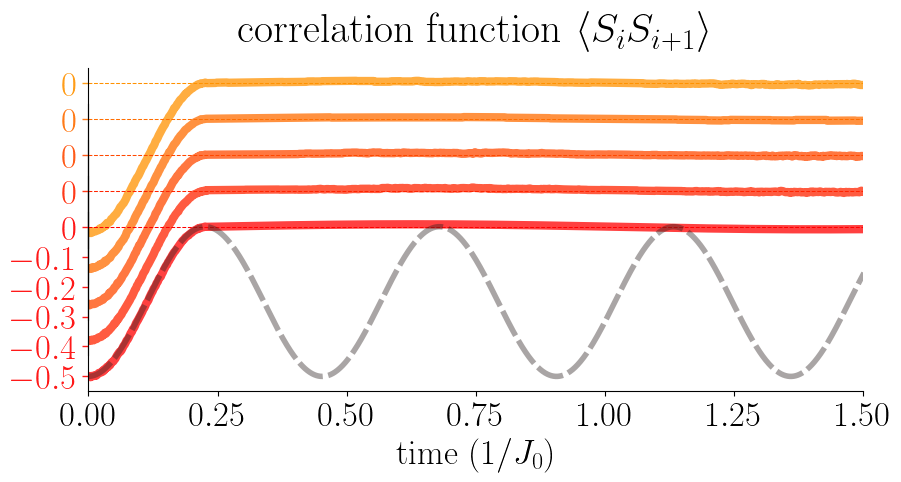

In [ ]:
# plot settings
fig, axes = plt.subplots(5, figsize=(10, 4.2))
plt.subplots_adjust(hspace=-0.8)

# remove the annoying visual elements
for ax in axes[:-1]:
    ax.set_facecolor('none')
    ax.tick_params(labelbottom=False)
axes[-1].set_facecolor('none')

# set colors
cols_alpha = colors

# ED reference
ref = ed.observables['correlations'][(0,2)]

# actual plot
for (i,ax) in enumerate(axes[::-1]):
    ax.axhline(y=0, color=cols_alpha[i], linewidth=0.75, ls = "--")
    ax.plot(times, alphas_data[i]/4, color = cols_alpha[i], lw = 6, alpha = 0.75)
    if i == 0:
        ax.plot(ed.times, ref, lw = 4, ls = (0,(5,1)), color = '#291F1E', alpha = 0.4)

# set some plot settings
#axes[-1].set_xlabel('time $(1/J_0)$')

for (i,ax) in enumerate(axes[::-1]):
    # axis ranges
    ax.set_xlim([0,1.5])
    ax.set_ylim([-0.55, 0.05])

    # ticks
    if i != 0:
        ax.set_yticks([0])
    else:
        ax.set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0])
        ax.set_yticklabels(["$-0.5$", "$-0.4$", "$-0.3$", "$-0.2$", "$-0.1$", "$0$"])

    # spines (graph borders)
    if i != 0:
        ax.spines[['right', 'top', 'bottom']].set_visible(False)
        ax.tick_params(axis='x', length=0)
    else:
        ax.spines[['right', 'top']].set_visible(False)
    
    # tick labels: colors and alphas
    for label in ax.get_yticklabels():
        label.set_color(cols_alpha[i])
        label.set_alpha(0.9)
    ax.tick_params(axis='y', which='both', color=cols_alpha[i], width = 1, length = 4)
    for tick_line in ax.yaxis.get_ticklines():
        tick_line.set_alpha(0.9)

# plot labels
axes[-1].set_xlabel("time $(1/J_0)$")
axes[0].set_title(r"correlation function $\left< S_i S_{i+1} \right>$", pad = 20)

plt.savefig("ultrafast_alphas.svg", format="svg", bbox_inches = "tight")

## sizes plot

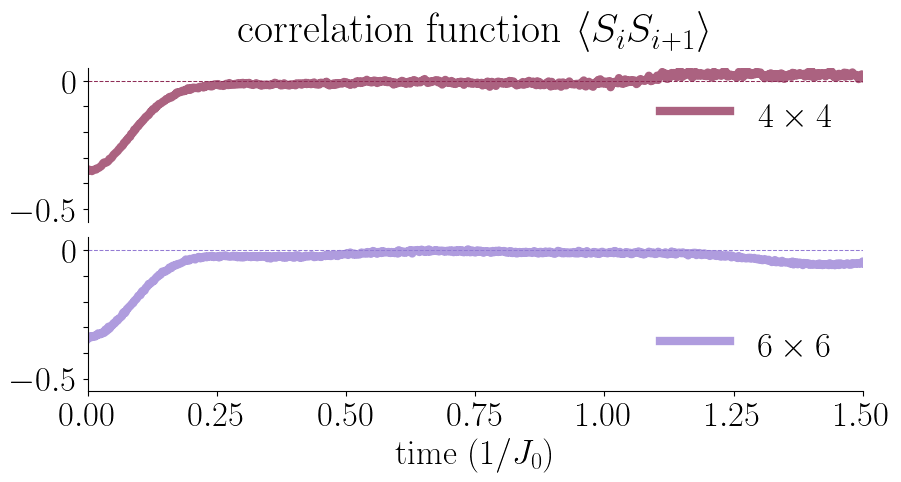

In [34]:
# plot settings
fig, axes = plt.subplots(2, figsize=(10, 4.2))
plt.subplots_adjust(hspace=0.1)
axes[0].tick_params(labelbottom=False)

# visual settings
# quinacridone magenta, tropical indigo
cols_sizes = ["#8F2D56", "#947BD3"]

# plots themselves
for (i,ax) in enumerate(axes):
    ax.axhline(y=0, color=cols_sizes[i], linewidth=0.75, ls = "--")
    ax.plot(times, sizes_data[1:][i], color = cols_sizes[i], lw = 6, alpha = 0.75, label = r"${:} \times {:}$".format(sizes[i+1], sizes[i+1]))


for (i,ax) in enumerate(axes[::-1]):
    # axis ranges
    ax.set_xlim([0,1.5])
    ax.set_ylim([-0.55, 0.05])

    # ticks
    ax.set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0])
    ax.set_yticklabels(["$-0.5$", "", "", "", "", "$0$"])

    # spines (graph borders)
    if i != 0:
        ax.spines[['right', 'top', 'bottom']].set_visible(False)
        ax.tick_params(axis='x', length=0)
    else:
        ax.spines[['right', 'top']].set_visible(False)

# plot labels
axes[-1].set_xlabel("time $(1/J_0)$")
axes[0].set_title(r"correlation function $\left< S_i S_{i+1} \right>$", pad = 20)

# legends
axes[0].legend(frameon = False)
axes[1].legend(frameon = False)

plt.savefig("ultrafast_sizes.svg", format="svg", bbox_inches = "tight")